In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../DATA/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
df[df['sex'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.drop([3, 339], axis=0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [12]:
df[df['sex'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [13]:
null_indexes = df[df['sex'].isnull()].index

In [14]:
df.loc[null_indexes]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [15]:
df.groupby(['species', 'island', 'sex' ]).mean(numeric_only=True)

culmen_length_mm  culmen_depth_mm  \
species   island    sex                                         
Adelie    Biscoe    FEMALE         37.359091        17.704545   
                    MALE           40.590909        19.036364   
          Dream     FEMALE         36.911111        17.618519   
                    MALE           40.071429        18.839286   
          Torgersen FEMALE         37.554167        17.550000   
                    MALE           40.586957        19.391304   
Chinstrap Dream     FEMALE         46.573529        17.588235   
                    MALE           51.094118        19.252941   
Gentoo    Biscoe    .              44.500000        15.700000   
                    FEMALE         45.563793        14.237931   
                    MALE           49.473770        15.718033   

                            flipper_length_mm  body_mass_g  
species   island    sex                                     
Adelie    Biscoe    FEMALE         187.181818  3369.318182  
                    MALE           190.409091  4050.000000  
          Dream     FEMALE         187.851852  3344.444444  
                    MALE           191.928571  4045.535714  
          Torgersen FEMALE         188.291667  3395.833333  
                    MALE           194.913043  4034.782609  
Chinstrap Dream     FEMALE         191.735294  3527.205882  
                    MALE           199.911765  3938.970588  
Gentoo    Biscoe    .              217.000000  4875.000000  
                    FEMALE         212.706897  4679.741379  
                    MALE           221.540984  5484.836066

In [16]:
df.groupby(['species', 'sex']).mean(numeric_only=True)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
species   sex                                                            
Adelie    FEMALE         37.257534        17.621918         187.794521   
          MALE           40.390411        19.072603         192.410959   
Chinstrap FEMALE         46.573529        17.588235         191.735294   
          MALE           51.094118        19.252941         199.911765   
Gentoo    .              44.500000        15.700000         217.000000   
          FEMALE         45.563793        14.237931         212.706897   
          MALE           49.473770        15.718033         221.540984   

                  body_mass_g  
species   sex                  
Adelie    FEMALE  3368.835616  
          MALE    4043.493151  
Chinstrap FEMALE  3527.205882  
          MALE    3938.970588  
Gentoo    .       4875.000000  
          FEMALE  4679.741379  
          MALE    5484.836066

In [17]:
df.loc[8, 'sex'] = 'FEMALE'

In [18]:
df.loc[9, 'sex'] = 'MALE'

In [19]:
df.loc[[10, 11, 47]] = df.loc[[10, 11, 47]].fillna('FEMALE')

In [20]:
df[df['sex'] == '.']
df.loc[336, 'sex'] = 'FEMALE'

#SUBSTITUTING . VALUE WITH FEMALE BASED ON OTHER DATA

In [21]:
df.loc[[246, 286, 324]] = df.loc[[246, 286, 324]].fillna('FEMALE')

In [22]:
df.loc[[8, 9, 10, 11, 47, 246, 286, 324]]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,FEMALE
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,MALE
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,FEMALE
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,FEMALE
47,Adelie,Dream,37.5,18.9,179.0,2975.0,FEMALE
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,FEMALE
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,FEMALE
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,FEMALE


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 29.5+ KB


In [24]:
pd.get_dummies(df['island'], drop_first=True,dtype=int)

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1
...,...,...
338,0,0
340,0,0
341,0,0
342,0,0


In [25]:
df['sex'] = pd.get_dummies(df['sex'], drop_first=True, dtype=int)

In [26]:
df = pd.concat([df, pd.get_dummies(df['island'], drop_first=True, dtype=int)], axis=1)

In [27]:
df = df.drop('island', axis=1)

In [28]:
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,1,0,1
...,...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,0,0,0
340,Gentoo,46.8,14.3,215.0,4850.0,0,0,0
341,Gentoo,50.4,15.7,222.0,5750.0,1,0,0
342,Gentoo,45.2,14.8,212.0,5200.0,0,0,0


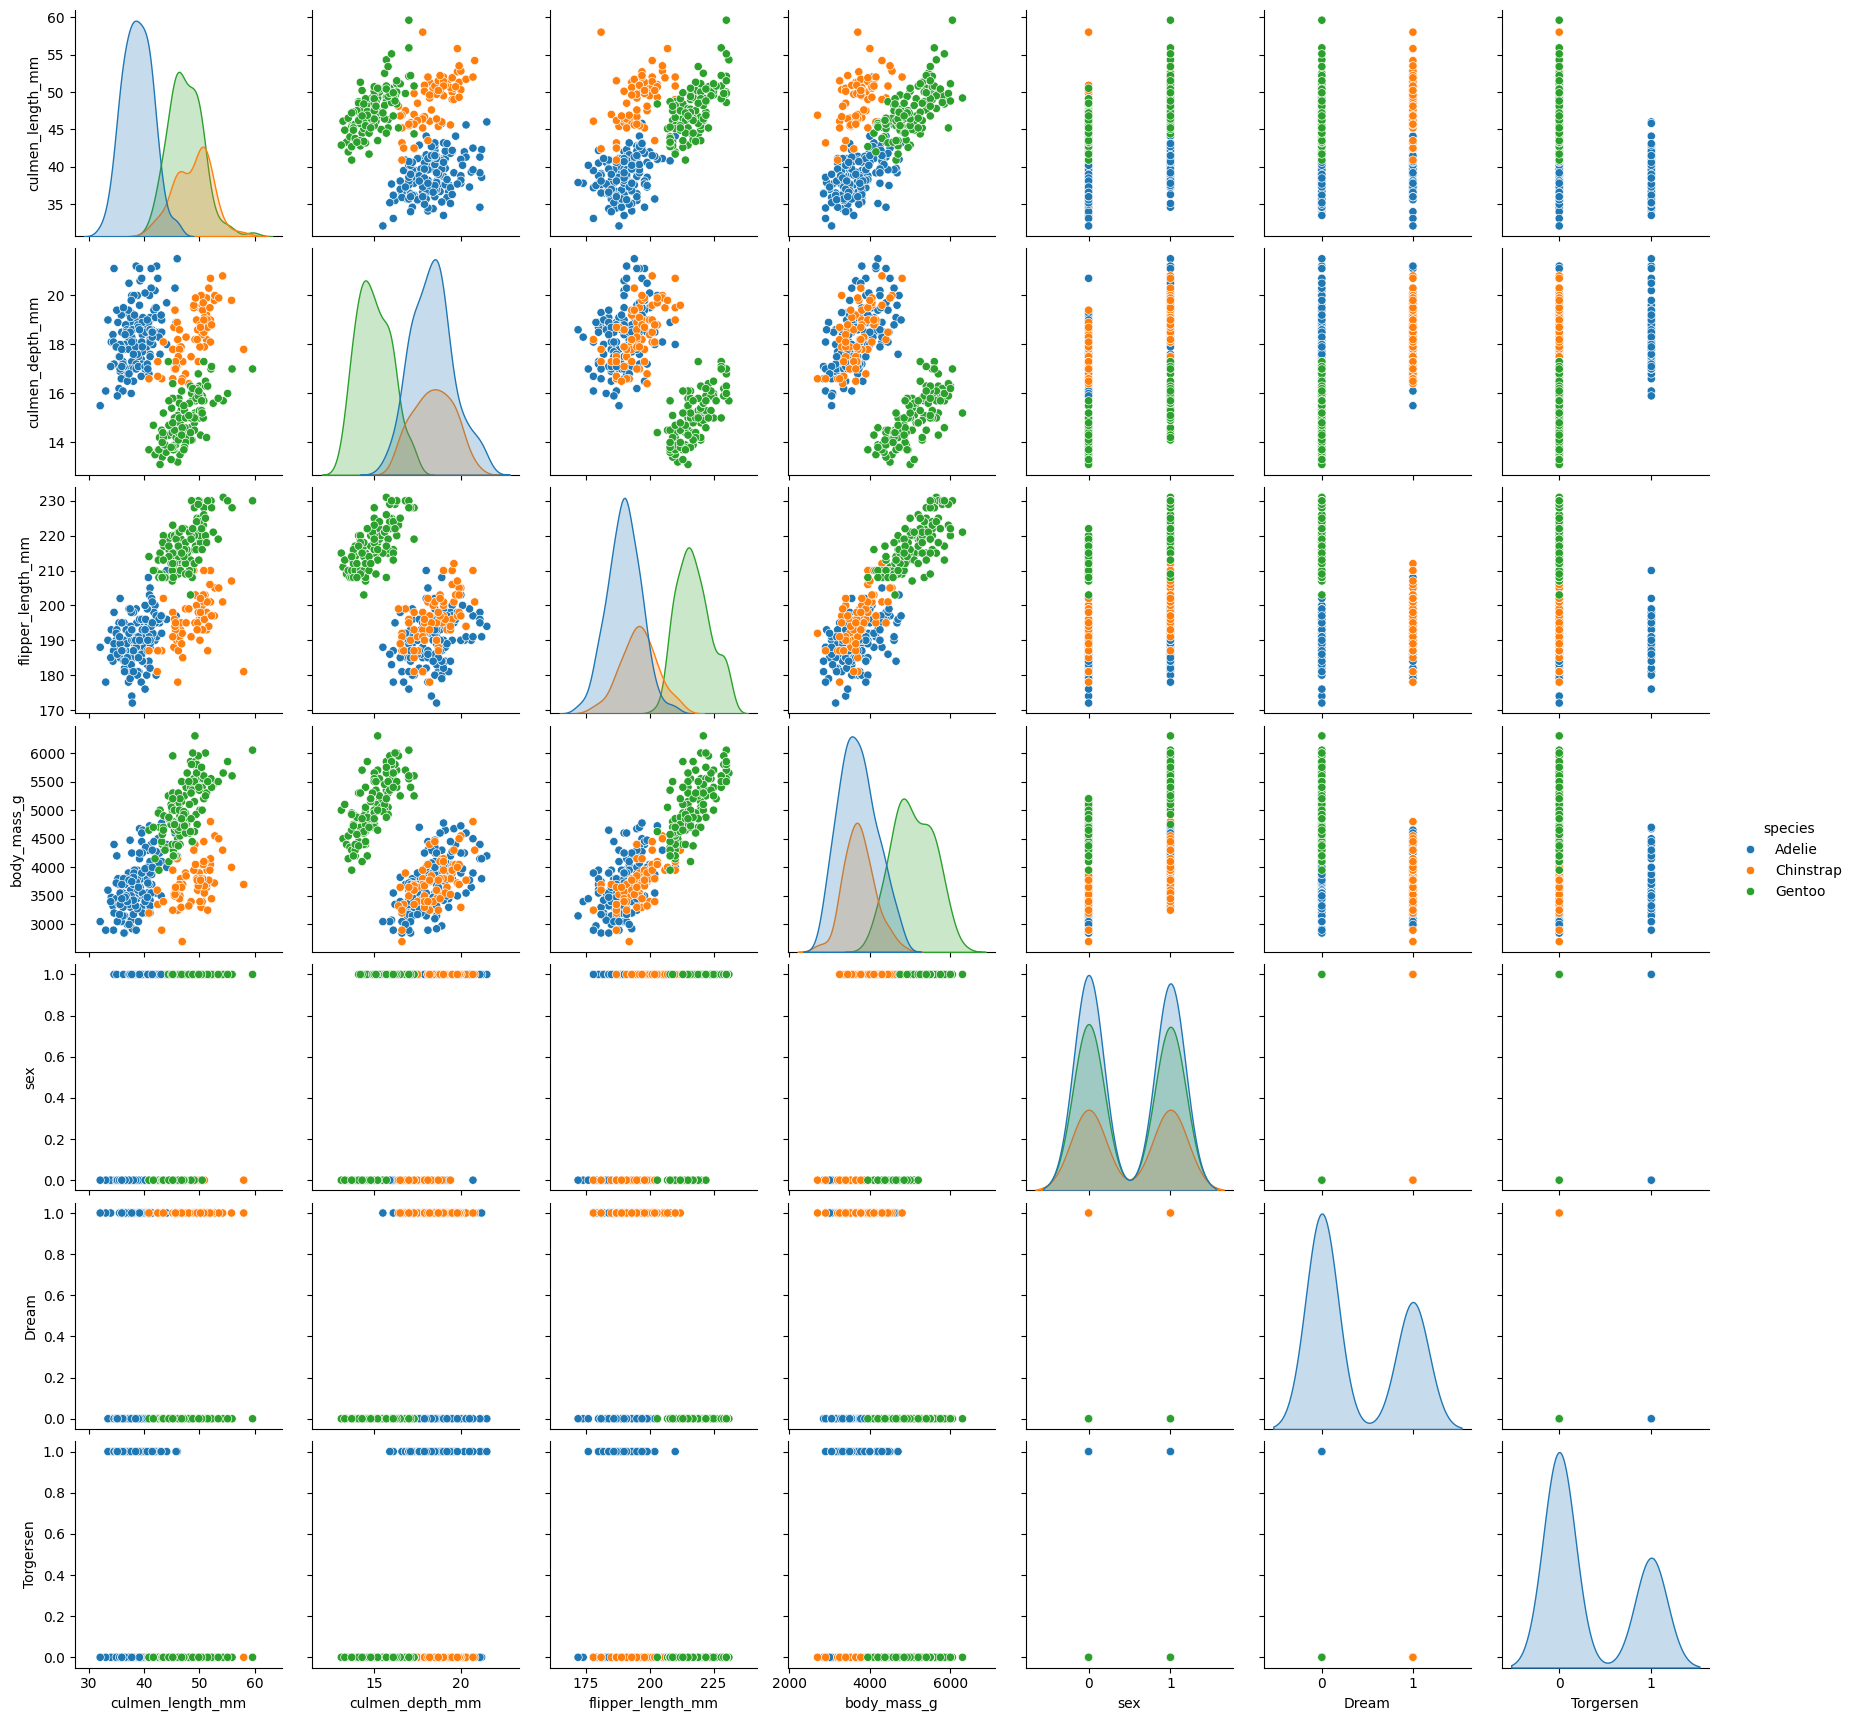

In [29]:
sns.pairplot(data=df, hue='species')

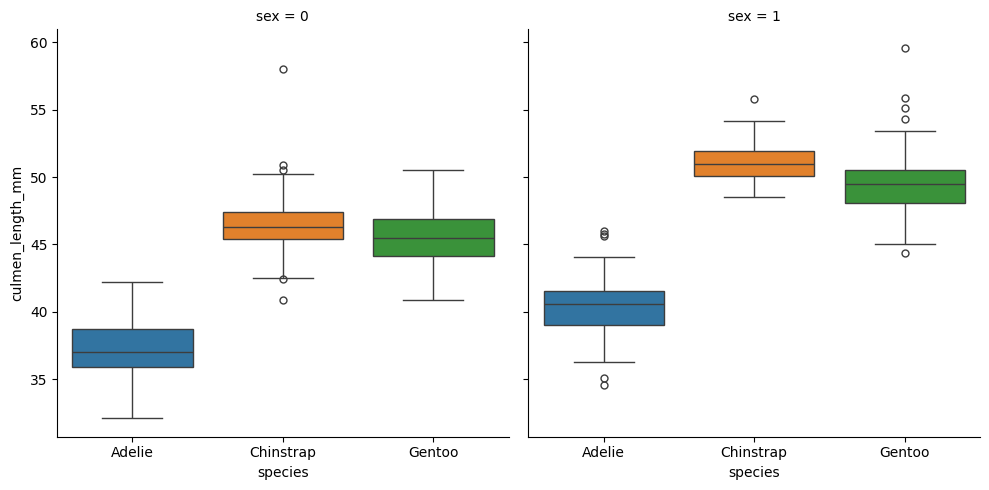

In [30]:
sns.catplot(x='species', y='culmen_length_mm', data=df, hue='species', kind='box', col='sex')

In [31]:
X = df.drop('species', axis=1)

In [32]:
y = df['species']

AS WE WILL USE DECISION TREE, WE CAN LEAVE THE STEP OF SCALING DATA(WE WON'T USE SEVERAL FEATURES SIMULTANEOUSLY)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model = DecisionTreeClassifier()

In [37]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
base_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [40]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        41
   Chinstrap       1.00      0.88      0.94        25
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       103
   macro avg       0.98      0.96      0.97       103
weighted avg       0.97      0.97      0.97       103



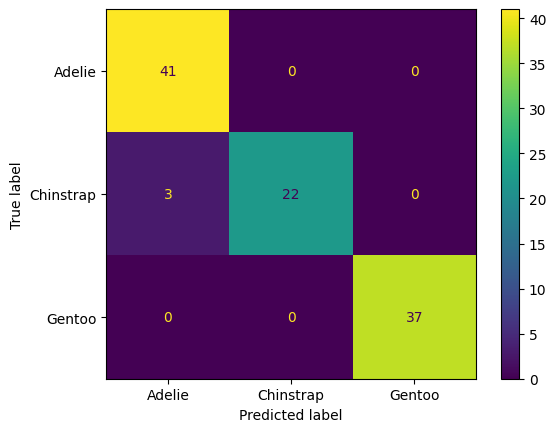

In [41]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [42]:
model.feature_importances_

array([0.35883011, 0.0494937 , 0.53536805, 0.00890727, 0.01002068,
       0.03738019, 0.        ])

In [43]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'Dream', 'Torgersen'],
      dtype='object')

In [44]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['feature importance']).sort_values('feature importance', ascending=False)

,feature importance
flipper_length_mm,0.535368
culmen_length_mm,0.358830
culmen_depth_mm,0.049494
Dream,0.037380
sex,0.010021
body_mass_g,0.008907
Torgersen,0.000000


In [45]:
#when building a decision tree, some features can be unused 

In [51]:
from sklearn.tree import plot_tree

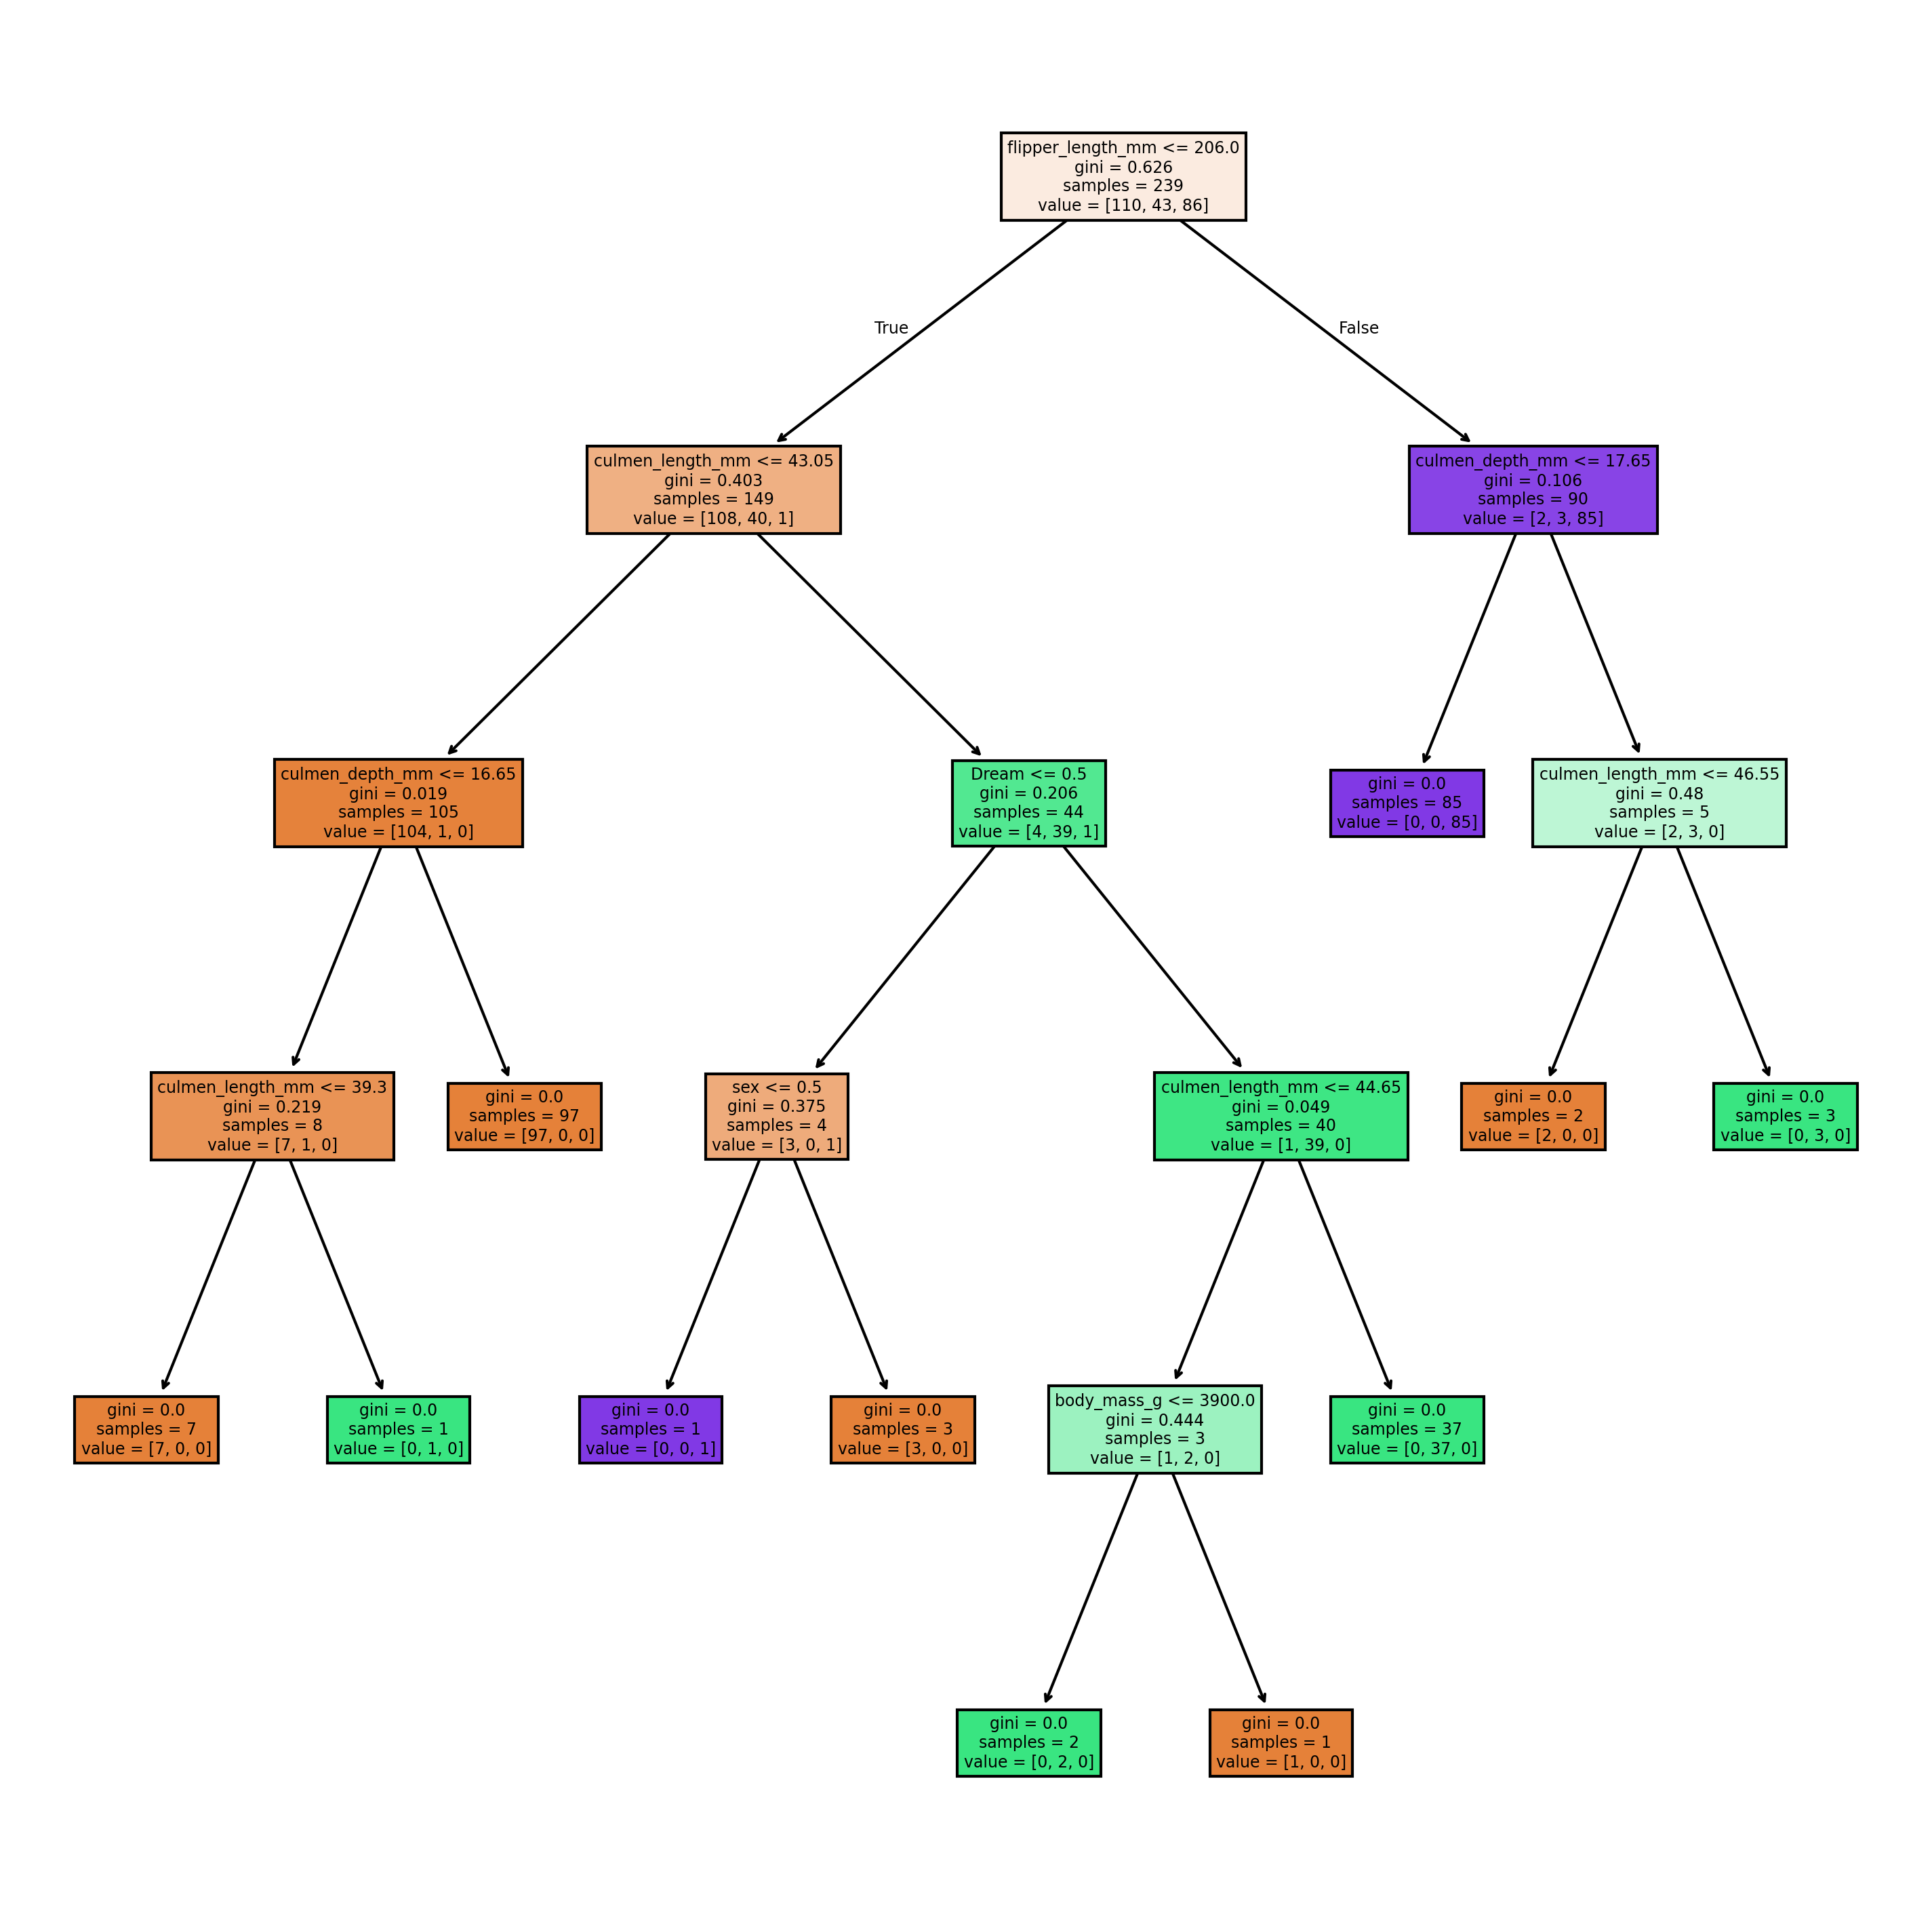

In [63]:
plt.figure(figsize=(12, 12), dpi=300)
plot_tree(model, feature_names=X.columns, filled=True);

In [58]:
#Splitting of root node here is based on the most important feature, flipper_length_mm


In [ ]:
import graphviz
import sklearn
from IPython.display import display

In [48]:
dt = sklearn.tree.export_graphviz(model, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)

In [49]:
gr = graphviz.Source(dt)

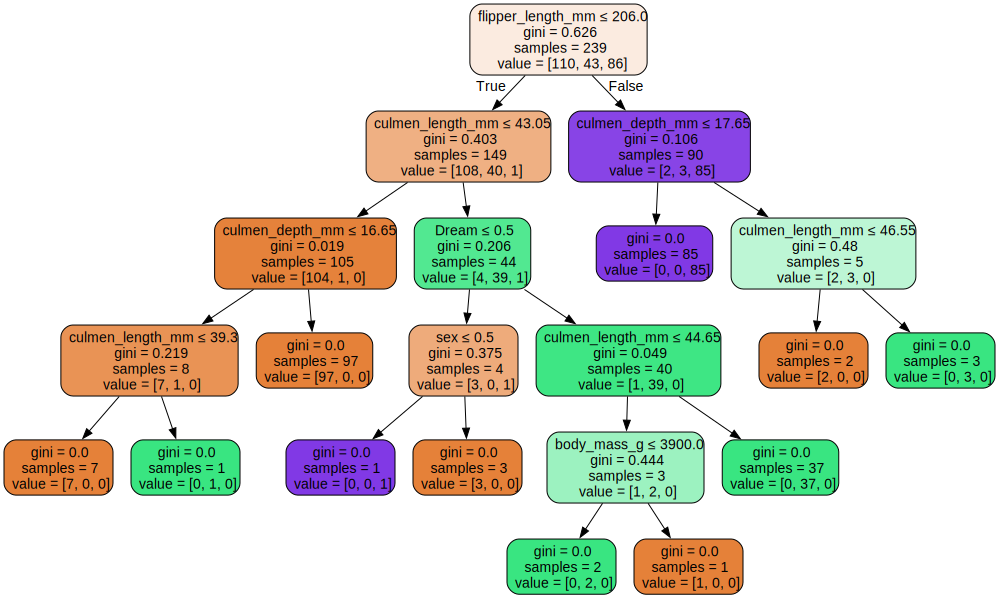

In [50]:
gr

In [ ]:
len(X_train)
#Samples are number of input points in node

#3 different colors represent 3 different classes of points
#the darker the color, the more samples of that class are in the node

239

In [89]:
from IPython.display import Image

In [96]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    dt = sklearn.tree.export_graphviz(model, out_file=None, feature_names=X.columns,
                                       filled=True, rounded=True, special_characters=True)
    
    
    graph = graphviz.Source(dt, filename='tree', format='png')
    png_path = graph.render()
    display(Image('tree.png'))
    
    return model

              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        41
   Chinstrap       1.00      0.88      0.94        25
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       103
   macro avg       0.98      0.96      0.97       103
weighted avg       0.97      0.97      0.97       103





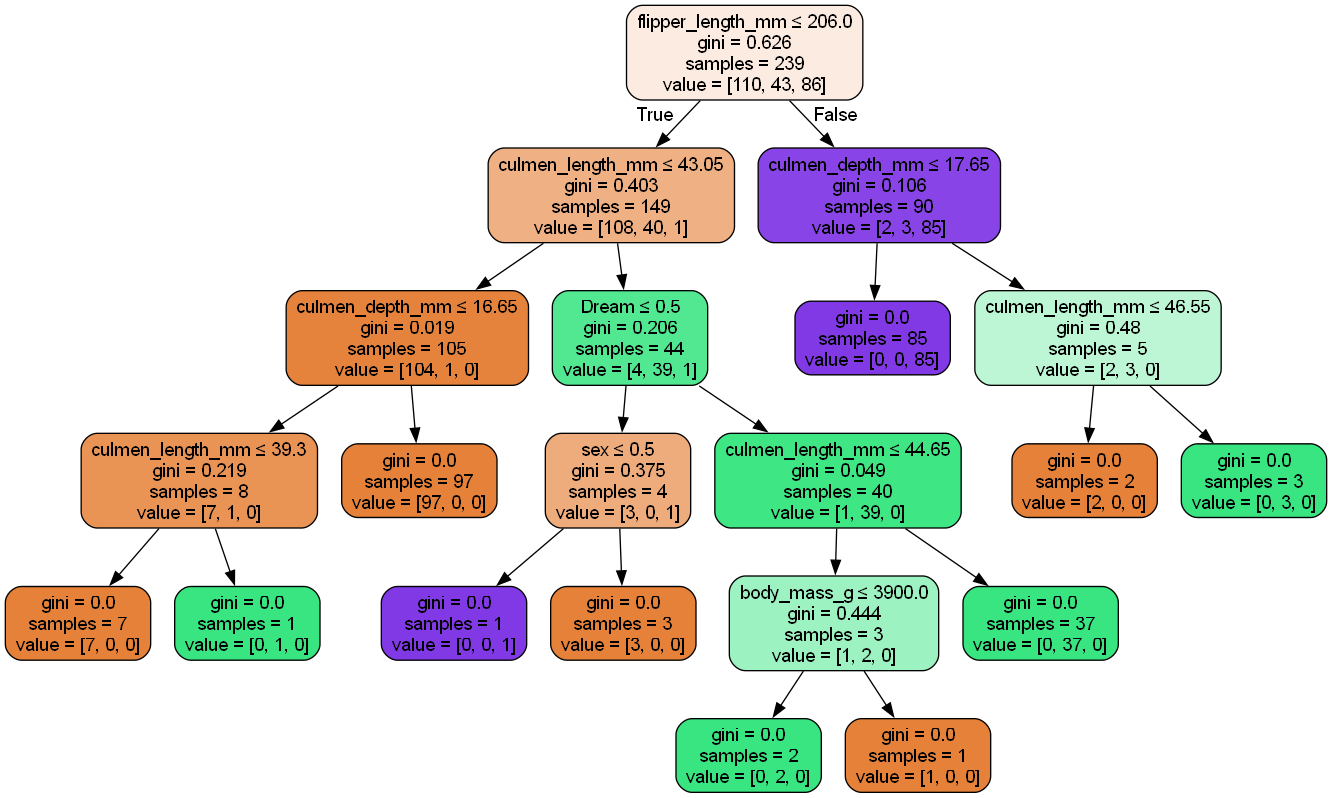

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [97]:
report_model(model)

In [105]:
model_2 = DecisionTreeClassifier(max_depth=2)

In [106]:
model_2.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        41
   Chinstrap       0.88      0.88      0.88        25
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103





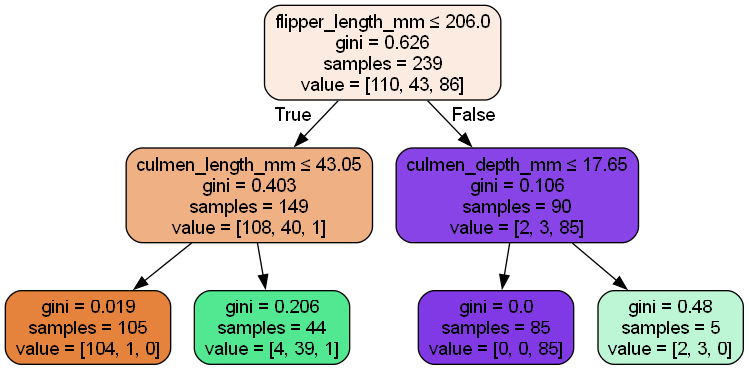

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [107]:
report_model(model_2)

In [104]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(
 |      *,
 |      criterion='gini',
 |      splitter='best',
 |      max_depth=None,
 |      min_samples_split=2,
 |      min_samples_leaf=1,
 |      min_weight_fraction_leaf=0.0,
 |      max_features=None,
 |      random_state=None,
 |      max_leaf_nodes=None,
 |      min_impurity_decrease=0.0,
 |      class_weight=None,
 |      ccp_alpha=0.0,
 |      monotonic_cst=None
 |  )
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best",

In [109]:
model_max_leaf_3 = DecisionTreeClassifier(max_leaf_nodes=3)

In [110]:
model_max_leaf_3.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,3
,min_impurity_decrease,0.0
,class_weight,None


              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        41
   Chinstrap       0.87      0.80      0.83        25
      Gentoo       0.95      1.00      0.97        37

    accuracy                           0.92       103
   macro avg       0.92      0.91      0.91       103
weighted avg       0.92      0.92      0.92       103





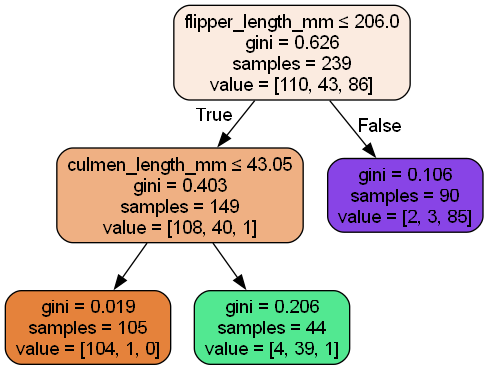

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,3
,min_impurity_decrease,0.0
,class_weight,None


In [111]:
report_model(model_max_leaf_3)

In [ ]:
#only 3 leaves are left {we used max_leaf_nodes=3}

In [112]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
#information gain metric == entropy
#or entropy is just one of the names for information gain

In [113]:
entropy_tree.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        41
   Chinstrap       0.96      0.88      0.92        25
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       103
   macro avg       0.96      0.95      0.96       103
weighted avg       0.96      0.96      0.96       103





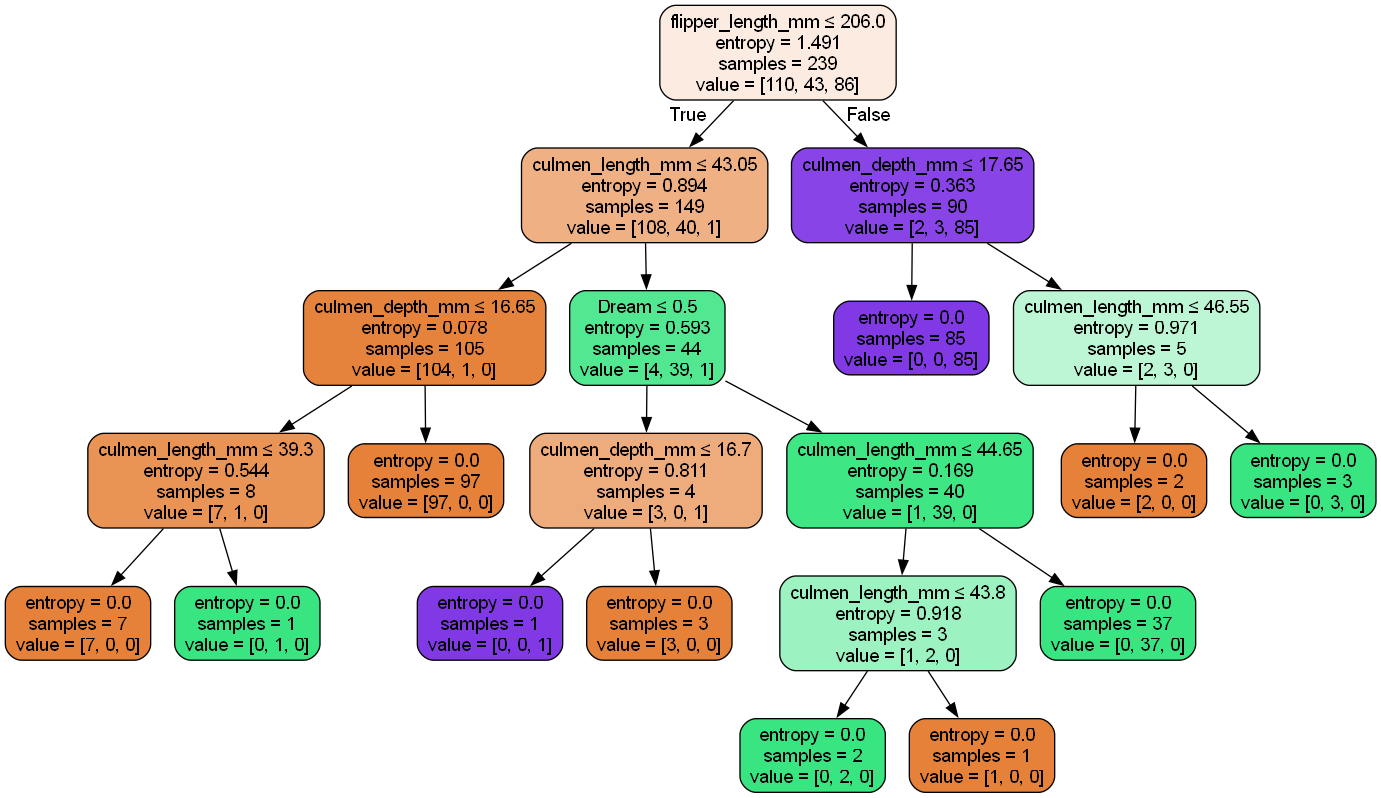

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [114]:
report_model(entropy_tree)

In [ ]:
ConfusionMatrixDisplay.from_estimator()

In [ ]:
DecisionTreeClassifier()